In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import integrate

<ipython-input-2-9322b0ad5b02>:3: RuntimeWarning: overflow encountered in square
  C = 3 * R * (((theta_E/T)**2 * np.exp(theta_E/T)) / ((np.exp(theta_E/T) - 1)**2))
<ipython-input-2-9322b0ad5b02>:3: RuntimeWarning: overflow encountered in exp
  C = 3 * R * (((theta_E/T)**2 * np.exp(theta_E/T)) / ((np.exp(theta_E/T) - 1)**2))
<ipython-input-2-9322b0ad5b02>:3: RuntimeWarning: invalid value encountered in true_divide
  C = 3 * R * (((theta_E/T)**2 * np.exp(theta_E/T)) / ((np.exp(theta_E/T) - 1)**2))


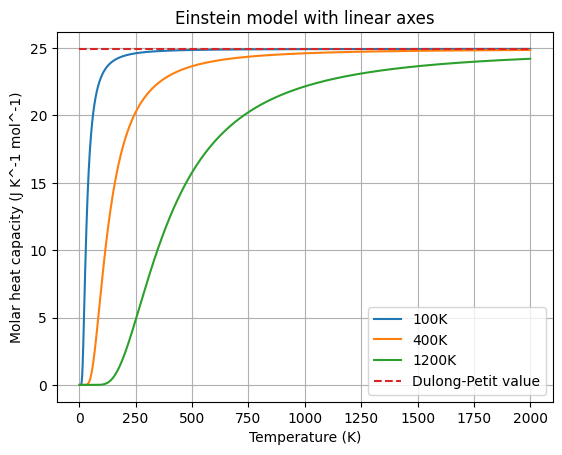

In [2]:
def Einstein(T, R, theta_E):
  #defining the Einstein function and its constants
  C = 3 * R * (((theta_E/T)**2 * np.exp(theta_E/T)) / ((np.exp(theta_E/T) - 1)**2))
  return C


#defining gas constant value
R = 8.314472

#setting up a time variable 
T = np.arange(1, 2000)

Einstein_100 = Einstein(T, R, 100)
Einstein_400 = Einstein(T, R, 400)
Einstein_1200 = Einstein(T, R, 1200)

plt.plot(T, Einstein_100, label='100K')
plt.plot(T, Einstein_400, label='400K')
plt.plot(T, Einstein_1200, label='1200K')
x = np.linspace(1, 2000)
y = np.linspace(24.9, 24.9)
plt.plot(x, y, linestyle='dashed', label='Dulong-Petit value',)
plt.xlabel("Temperature (K)")
plt.ylabel("Molar heat capacity (J K^-1 mol^-1)")
plt.title("Einstein model with linear axes")
plt.legend()
plt.grid()

#Dulong-Petit limit is 3R = 24.9

In [3]:
#np.linspace(-100, 200, 40)
len(np.arange(-10000, 100, 25))

404

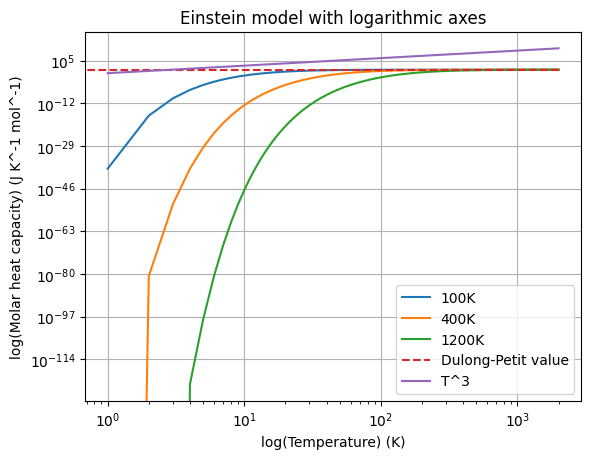

In [4]:
#Einstein_T3 = Einstein(T, R, theta_E)
Einstein_C = np.arange(1, 2000)
T_3 = np.arange(1, 2000)


plt.loglog(T, Einstein_100, label='100K')
plt.loglog(T, Einstein_400, label='400K')
plt.loglog(T, Einstein_1200, label='1200K')
x = np.linspace(-100, 2000)
y = np.linspace(24.9, 24.9)
plt.plot(x, y, linestyle='dashed', label='Dulong-Petit value',)
plt.loglog((T_3), (Einstein_C)**3, label='T^3')
plt.xlabel("log(Temperature) (K)")
plt.ylabel("log(Molar heat capacity) (J K^-1 mol^-1)")
plt.title("Einstein model with logarithmic axes")
plt.legend()
plt.grid()

#need to explain that model does not reproduce expected T^3 !!!!

In [5]:
#T in column 1, C in column 2
T_t, C_t = np.loadtxt('tin.txt', unpack=True)
T_d, C_d = np.loadtxt('diamond.txt', unpack=True)
T_l, C_l = np.loadtxt('lead.txt', unpack=True)
T_s, C_s = np.loadtxt('silicon.txt', unpack=True)
T_g, C_g = np.loadtxt('germanium.txt', unpack=True)

In [92]:
T_t_low = T_t[0:31]
T_g_low = T_g[0:2]
T_s_low = T_s[0:3]
T_d_low = T_d[0:30]
T_l_low = T_l[0:30]

C_t_low = C_t[0:31]
C_g_low = C_g[0:2]
C_s_low = C_s[0:3]
C_d_low = C_d[0:30]
C_l_low = C_l[0:30]

In [48]:
print(T_g_low)

[ 5. 10. 15. 20. 25. 30. 35.]


In [7]:
T_t_high = T_t[44:]
T_g_high = T_g[20:]
T_s_high = T_s[25:]
T_d_high = T_d[110:]
T_l_high = T_l[48:]

C_t_high = C_t[44:]
C_g_high = C_g[20:]
C_s_high = C_s[25:]
C_d_high = C_d[110:]
C_l_high = C_l[48:]

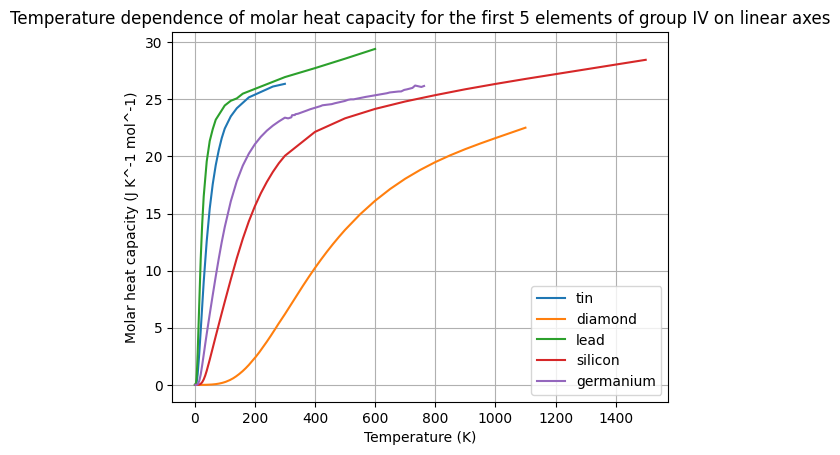

In [8]:
plt.plot(T_t, C_t, label='tin')
plt.plot(T_d, C_d, label='diamond')
plt.plot(T_l, C_l, label='lead')
plt.plot(T_s, C_s, label='silicon')
plt.plot(T_g, C_g, label='germanium')
plt.xlabel("Temperature (K)")
plt.ylabel("Molar heat capacity (J K^-1 mol^-1)")
plt.title("Temperature dependence of molar heat capacity for the first 5 elements of group IV on linear axes")
plt.legend()
plt.grid()

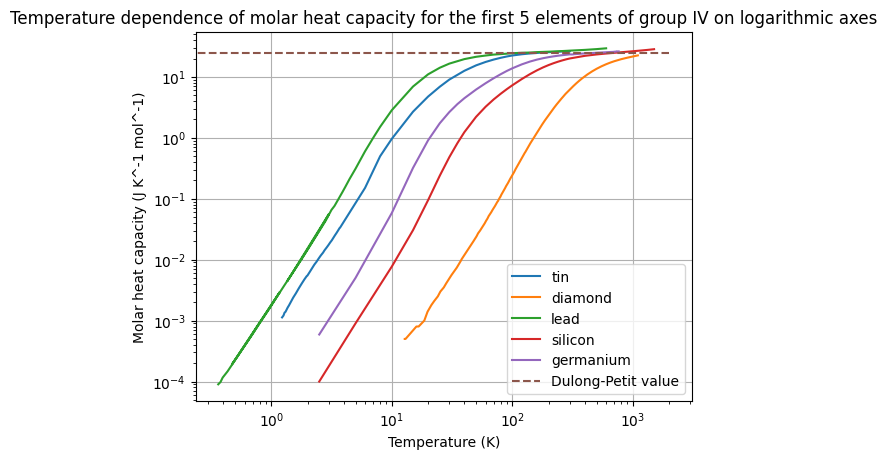

In [9]:
plt.loglog(T_t, C_t, label='tin')
plt.loglog(T_d, C_d, label='diamond')
plt.loglog(T_l, C_l, label='lead')
plt.loglog(T_s, C_s, label='silicon')
plt.loglog(T_g, C_g, label='germanium')
x = np.linspace(-10, 2000)
y = np.linspace(24.9, 24.9)
plt.plot(x, y, linestyle='dashed', label='Dulong-Petit value',)
#plt.loglog((T_3), (Einstein_C)**3, label='T^3')
plt.xlabel("Temperature (K)")
plt.ylabel("Molar heat capacity (J K^-1 mol^-1)")
plt.title("Temperature dependence of molar heat capacity for the first 5 elements of group IV on logarithmic axes")
plt.grid()
plt.legend()

In [10]:
import sympy as sy

8.57097204994235
0.07114351803934064
116.90654369648851
2.4191464386177204


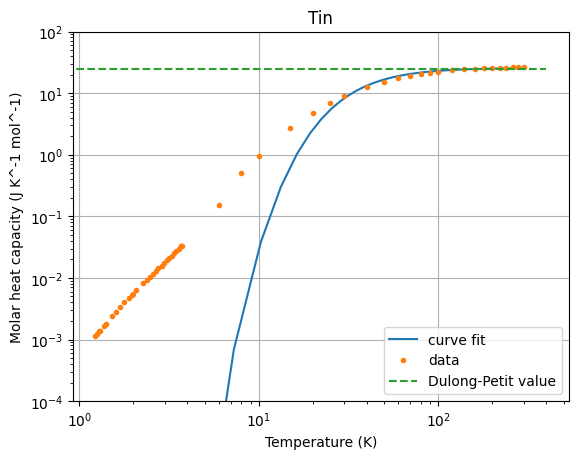

In [11]:
#coming up with a guess to compare curve fit to
x_plot = np.linspace(min(T_t), max(T_t), num=100)
p_guess = np.array([10, 150])
y_guess = Einstein(T_t, *p_guess)

#curve fitting
popt, pcov = curve_fit(Einstein, T_t, C_t, p_guess)

print(popt[0])
print(np.sqrt(pcov.diagonal()[0]))
print(popt[1])
print(np.sqrt(pcov.diagonal()[1]))

y_fit = Einstein(x_plot, *popt)

plt.plot(x_plot, y_fit, label='curve fit')
plt.loglog(T_t, C_t, 'o', markersize=3, label='data')
x = np.linspace(0, 400)
y = np.linspace(24.9, 24.9)
plt.plot(x, y, linestyle='dashed', label='Dulong-Petit value',)
plt.ylim(10e-5,100)
#plt.xlim(10, 500)
plt.xlabel("Temperature (K)")
plt.ylabel("Molar heat capacity (J K^-1 mol^-1)")
plt.title('Tin')
plt.legend()
plt.grid()

8.778268451141368
0.05990716082042034
69.98142480508865
1.5459733988355573


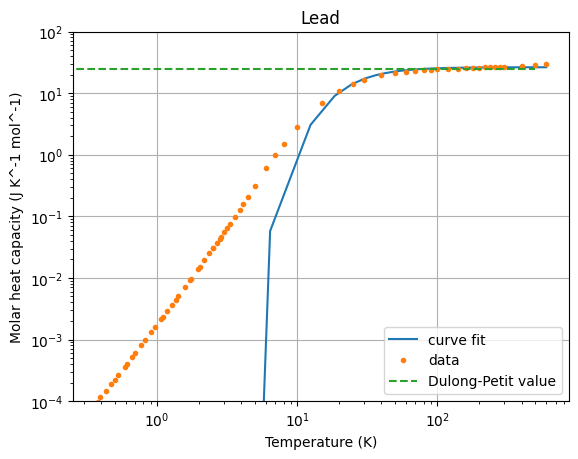

In [12]:
#coming up with a guess to compare curve fit to
x_plot = np.linspace(min(T_l), max(T_l), num=100)
p_guess = np.array([10, 100])
y_guess = Einstein(T_l, *p_guess)

#curve fitting
popt, pcov = curve_fit(Einstein, T_l, C_l, p_guess)

print(popt[0])
print(np.sqrt(pcov.diagonal()[0]))
print(popt[1])
print(np.sqrt(pcov.diagonal()[1]))

y_fit = Einstein(x_plot, *popt)

plt.plot(x_plot, y_fit, label='curve fit')
plt.loglog(T_l, C_l, 'o', markersize=3, label='data')
x = np.linspace(0, 500)
y = np.linspace(24.9, 24.9)
plt.plot(x, y, linestyle='dashed', label='Dulong-Petit value',)
plt.ylim(10e-5,100)
#plt.xlim(10, 500)
plt.xlabel("Temperature (K)")
plt.ylabel("Molar heat capacity (J K^-1 mol^-1)")
plt.title('Lead')
plt.legend()
plt.grid()

8.733757448850891
0.14215472451877867
467.75660211509785
15.695707373766911


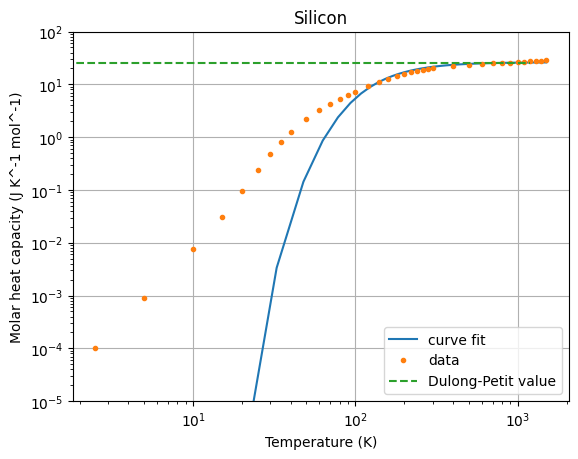

In [13]:
#coming up with a guess to compare curve fit to
x_plot = np.linspace(min(T_s), max(T_s), num=100)
p_guess = np.array([10, 500])
y_guess = Einstein(T_s, *p_guess)

#curve fitting
popt, pcov = curve_fit(Einstein, T_s, C_s, p_guess)

print(popt[0])
print(np.sqrt(pcov.diagonal()[0]))
print(popt[1])
print(np.sqrt(pcov.diagonal()[1]))

y_fit = Einstein(x_plot, *popt)

plt.plot(x_plot, y_fit, label='curve fit')
plt.loglog(T_s, C_s, 'o', markersize=3, label='data')
x = np.linspace(0, 1200)
y = np.linspace(24.9, 24.9)
plt.plot(x, y, linestyle='dashed', label='Dulong-Petit value',)
plt.ylim(10e-6,100)
#plt.xlim(10, 500)
plt.xlabel("Temperature (K)")
plt.ylabel("Molar heat capacity (J K^-1 mol^-1)")
plt.title('Silicon')
plt.legend()
plt.grid()

7.901416733785473
0.06060730337196976
1256.9244691435133
9.075550185399404


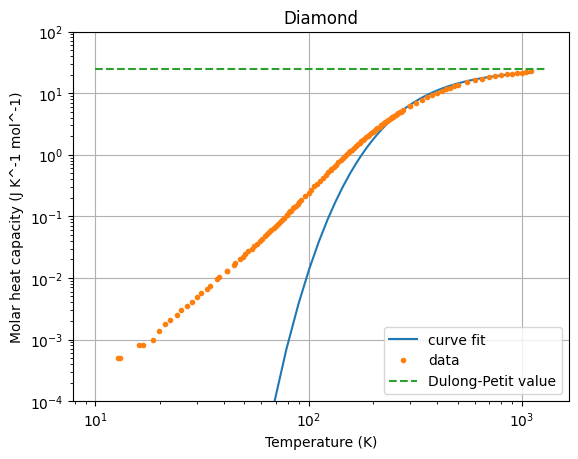

In [14]:
#coming up with a guess to compare curve fit to
x_plot = np.linspace(min(T_d), max(T_d), num=100)
p_guess = np.array([10, 1500])
y_guess = Einstein(T_d, *p_guess)

#curve fitting
popt, pcov = curve_fit(Einstein, T_d, C_d, p_guess)

print(popt[0])
print(np.sqrt(pcov.diagonal()[0]))
print(popt[1])
print(np.sqrt(pcov.diagonal()[1]))

y_fit = Einstein(x_plot, *popt)

plt.plot(x_plot, y_fit, label='curve fit')
plt.loglog(T_d, C_d, 'o', markersize=3, label='data')
x = np.linspace(10, 1300)
y = np.linspace(24.9, 24.9)
plt.plot(x, y, linestyle='dashed', label='Dulong-Petit value',)
plt.ylim(10e-5,100)
#plt.xlim(10, 500)
plt.xlabel("Temperature (K)")
plt.ylabel("Molar heat capacity (J K^-1 mol^-1)")
plt.title('Diamond')
plt.legend()
plt.grid()

8.421892636716645
0.0642292880489045
258.77809991722705
6.42872423657392


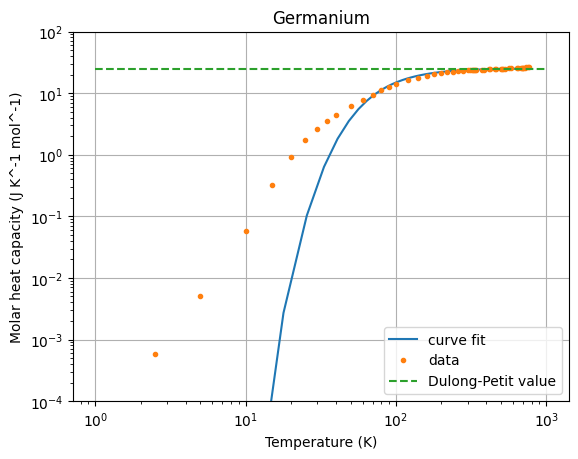

In [15]:
#coming up with a guess to compare curve fit to
x_plot = np.linspace(min(T_g), max(T_g), num=100)
p_guess = np.array([10, 150])
y_guess = Einstein(T_g, *p_guess)

#curve fitting
popt, pcov = curve_fit(Einstein, T_g, C_g, p_guess)

print(popt[0])
print(np.sqrt(pcov.diagonal()[0]))
print(popt[1])
print(np.sqrt(pcov.diagonal()[1]))

y_fit = Einstein(x_plot, *popt)

plt.plot(x_plot, y_fit, label='curve fit')
plt.loglog(T_g, C_g, 'o', markersize=3, label='data')
x = np.linspace(1, 1000)
y = np.linspace(24.9, 24.9)
plt.plot(x, y, linestyle='dashed', label='Dulong-Petit value',)
plt.ylim(10e-5,100)
#plt.xlim(10, 500)
plt.xlabel("Temperature (K)")
plt.ylabel("Molar heat capacity (J K^-1 mol^-1)")
plt.title('Germanium')
plt.legend()
plt.grid()

143.5775831884745
0.1440357357511178


"\nextrapolate_range = np.array([6, 7, 8, 9, 10])\nextrapolate_values = m * extrapolate_range + b\n\nplt.scatter(x, y, color='red', label='Data Points')\nplt.plot(np.concatenate([x, extrapolate_range]),\n         np.concatenate([y, extrapolate_values]),\n         color='blue', label='Extrapolated Line')\n"

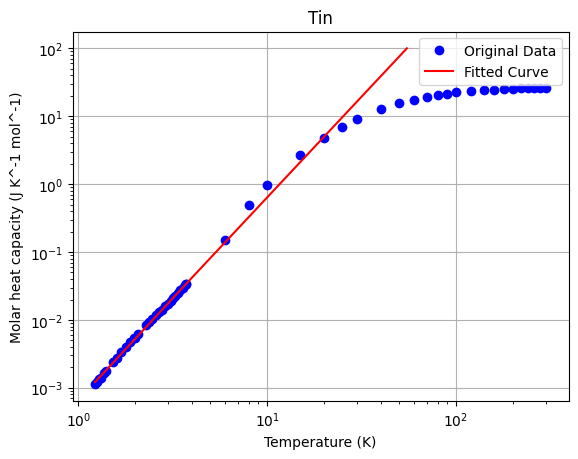

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import quad

def integrand(x):
    """
    Integrand of the Debye model.
    """
    return x**4 * np.exp(x) / (np.exp(x) - 1)**2

def debye_model(T, theta_D):
    """
    Debye model equation for heat capacity as a function of temperature.
    T: Temperature (in Kelvin)
    theta_D: Debye temperature (in Kelvin)
    """
    R = 8.314  # gas constant (J/(mol*K))
    integral_value = np.zeros_like(T)  # Initialize integral values array

    for i, t in enumerate(T):
        integral_value[i], _ = quad(integrand, 0, theta_D / t)

    return 9 * R * (T / theta_D)**3 * integral_value

#coming up with a guess to compare curve fit to
x_plot = np.linspace(min(T_t_low), max(T_t_low), num=100)
p_guess = np.array([200])
y_guess = debye_model(T_t_low, *p_guess)

# Fit the Debye model to the data
popt, pcov = curve_fit(debye_model, T_t_low, C_t_low, p_guess)

print(popt[0])
print(np.sqrt(pcov.diagonal()[0]))

y_fit = debye_model(x_plot, *popt)
extrapolate_x = np.array([55])
extrapolate_y = np.array([100])

# Plot the original data and the fitted curve
plt.loglog(T_t, C_t, 'bo', label='Original Data')
plt.plot(np.concatenate([x_plot, extrapolate_x]), np.concatenate([y_fit, extrapolate_y]), 'r-', label='Fitted Curve')
plt.xlabel('Temperature (K)')
plt.ylabel("Molar heat capacity (J K^-1 mol^-1)")
plt.title('Tin')
plt.grid()
plt.legend()

'''
extrapolate_range = np.array([6, 7, 8, 9, 10])
extrapolate_values = m * extrapolate_range + b

plt.scatter(x, y, color='red', label='Data Points')
plt.plot(np.concatenate([x, extrapolate_range]),
         np.concatenate([y, extrapolate_values]),
         color='blue', label='Extrapolated Line')
'''

364.61465254106287
0.856602438967143


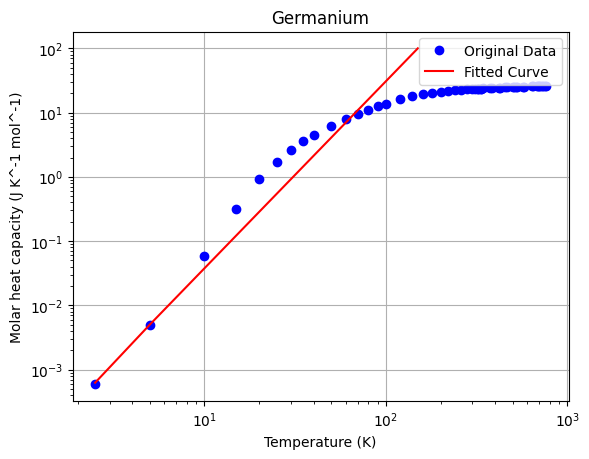

In [79]:
#coming up with a guess to compare curve fit to
x_plot = np.linspace(min(T_g_low), max(T_g_low), num=100)
p_guess = np.array([275])
y_guess = debye_model(T_g_low, *p_guess)

# Fit the Debye model to the data
popt, pcov = curve_fit(debye_model, T_g_low, C_g_low, p_guess)

print(popt[0])
print(np.sqrt(pcov.diagonal()[0]))
#print(popt[1])
#print(np.sqrt(pcov.diagonal()[1]))

y_fit = debye_model(x_plot, *popt)
extrapolate_x = np.array([150])
extrapolate_y = np.array([100])

# Plot the original data and the fitted curve
plt.loglog(T_g, C_g, 'bo', label='Original Data')
plt.plot(np.concatenate([x_plot, extrapolate_x]), np.concatenate([y_fit, extrapolate_y]), 'r-', label='Fitted Curve')
#plt.plot(x_plot, y_fit, 'r-', label='Fitted Curve')

plt.xlabel('Temperature (K)')
plt.ylabel("Molar heat capacity (J K^-1 mol^-1)")
plt.title('Germanium')
plt.legend()
plt.grid()

632.2088144888766
1.2535852834644852


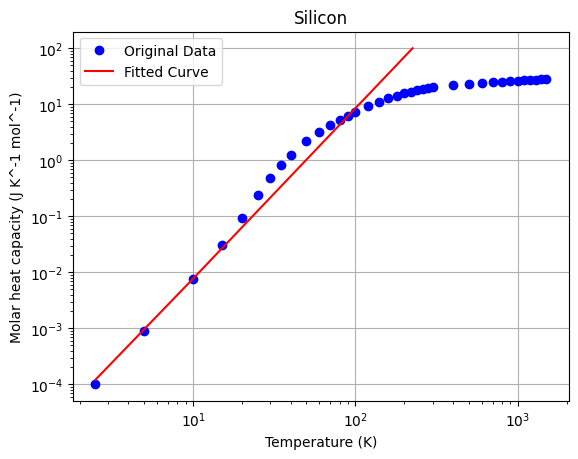

In [81]:
#coming up with a guess to compare curve fit to
x_plot = np.linspace(min(T_s_low), max(T_s_low), num=100)
p_guess = np.array([500])
y_guess = debye_model(T_s_low, *p_guess)

# Fit the Debye model to the data
popt, pcov = curve_fit(debye_model, T_s_low, C_s_low, p_guess)

print(popt[0])
print(np.sqrt(pcov.diagonal()[0]))
#print(popt[1])
#print(np.sqrt(pcov.diagonal()[1]))

y_fit = debye_model(x_plot, *popt)
extrapolate_x = np.array([225])
extrapolate_y = np.array([100])

# Plot the original data and the fitted curve
plt.loglog(T_s, C_s, 'bo', label='Original Data')
plt.plot(np.concatenate([x_plot, extrapolate_x]), np.concatenate([y_fit, extrapolate_y]), 'r-', label='Fitted Curve')
#plt.plot(x_plot, y_fit, 'r-', label='Fitted Curve')
plt.xlabel('Temperature (K)')
plt.ylabel("Molar heat capacity (J K^-1 mol^-1)")
plt.title('Silicon')
plt.legend()
plt.grid()

2170.967206236536
2.1009525269441522


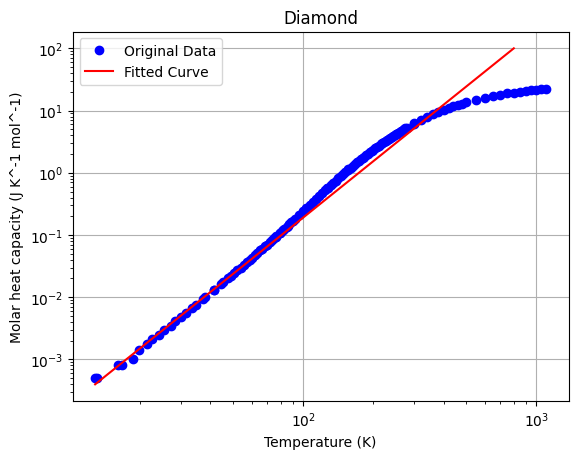

In [101]:
#coming up with a guess to compare curve fit to
x_plot = np.linspace(min(T_d_low), max(T_d_low), num=100)
p_guess = np.array([2000])
y_guess = debye_model(T_d_low, *p_guess)

# Fit the Debye model to the data
popt, pcov = curve_fit(debye_model, T_d_low, C_d_low, p_guess)

print(popt[0])
print(np.sqrt(pcov.diagonal()[0]))
#print(popt[1])
#print(np.sqrt(pcov.diagonal()[1]))

y_fit = debye_model(x_plot, *popt)
extrapolate_x = np.array([800])
extrapolate_y = np.array([100])

# Plot the original data and the fitted curve
plt.loglog(T_d, C_d, 'bo', label='Original Data')
plt.plot(np.concatenate([x_plot, extrapolate_x]), np.concatenate([y_fit, extrapolate_y]), 'r-', label='Fitted Curve')
#plt.plot(x_plot, y_fit, 'r-', label='Fitted Curve')
plt.xlabel('Temperature (K)')
plt.ylabel("Molar heat capacity (J K^-1 mol^-1)")
plt.title('Diamond')
plt.legend()
plt.grid()

<ipython-input-29-0615fdf91807>:10: RuntimeWarning: overflow encountered in double_scalars
  return x**4 * np.exp(x) / (np.exp(x) - 1)**2


99.17739795073341
0.21710419229990155


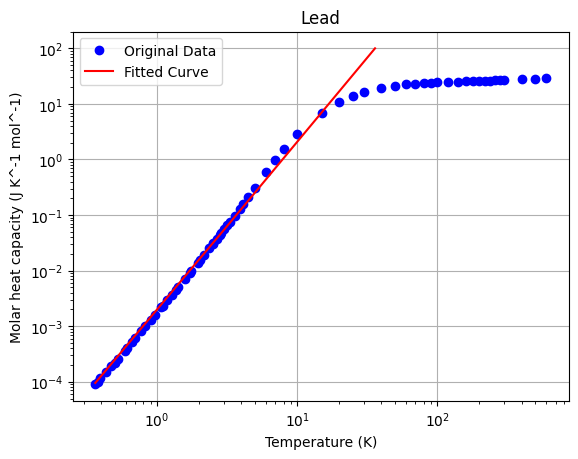

In [102]:
#coming up with a guess to compare curve fit to
x_plot = np.linspace(min(T_l_low), max(T_l_low), num=100)
p_guess = np.array([200])
y_guess = debye_model(T_l_low, *p_guess)

# Fit the Debye model to the data
popt, pcov = curve_fit(debye_model, T_l_low, C_l_low, p_guess)

print(popt[0])
print(np.sqrt(pcov.diagonal()[0]))
#print(popt[1])
#print(np.sqrt(pcov.diagonal()[1]))

y_fit = debye_model(x_plot, *popt)
extrapolate_x = np.array([36])
extrapolate_y = np.array([100])

# Plot the original data and the fitted curve
plt.loglog(T_l, C_l, 'bo', label='Original Data')
plt.plot(np.concatenate([x_plot, extrapolate_x]), np.concatenate([y_fit, extrapolate_y]), 'r-', label='Fitted Curve')
plt.xlabel('Temperature (K)')
plt.ylabel("Molar heat capacity (J K^-1 mol^-1)")
plt.title('Lead')
plt.legend()
plt.grid()